In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pymc3 as pm
import arviz as az
import pandas as pd

In [19]:
from scipy.stats import pearsonr

# Load the CSV dataset
data = pd.read_csv("iris.csv")

# Define the variables
sepal_length = data['sepal_length']
petal_width = data['petal_width']
petal_length = data['petal_length']

# Linear regression for Sepal Length and Petal Width
with pm.Model() as model1:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = alpha + beta * sepal_length
    
    sepal_width_observed = pm.Normal('sepal_width_observed', mu=mu, sd=epsilon, observed=petal_width)
    
    trace1 = pm.sample(2000, tune=2000)
    
# Linear regression for Petal Length and Petal Width
with pm.Model() as model2:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = alpha + beta * petal_length
    
    sepal_width_observed = pm.Normal('sepal_width_observed', mu=mu, sd=epsilon, observed=petal_width)
    
    trace2 = pm.sample(2000, tune=2000)

# Calculate Pearson correlation coefficients using scipy.stats
correlation1, _ = pearsonr(sepal_length, petal_width)
correlation2, _ = pearsonr(petal_length, petal_width)

print("Correlation")
print("Sepal Length and Petal Width:", correlation1)
print("Petal Length and Petal Width:", correlation2)

/Applications/anaconda3/envs/dice/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, beta, alpha]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 11 seconds.
/Applications/anaconda3/envs/dice/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, beta, alpha]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9 seconds.
The acceptance probability does not match the target. It is 0.669183125240836, but should be close to 0.8. Try to increase the number of tuning steps.


Correlation
Sepal Length and Petal Width: 0.8179411262715752
Petal Length and Petal Width: 0.9628654314027969


In [41]:
# High Correlation

data = pd.read_csv("iris.csv")

y_var = data['petal_width']
x_var = data['petal_length']

# Model: Linear Regression with Petal Length as the independent variable
with pm.Model() as model_high_corr:
    alpha_high = pm.Normal('alpha_high', mu=0, sd=10)
    beta_high = pm.Normal('beta_high', mu=0, sd=10)
    epsilon_high = pm.HalfCauchy('epsilon_high', 5)
    
    mu_high = alpha_high + beta_high * x_var
    
    y_high = pm.Normal('y_high', mu=mu_high, sd=epsilon_high, observed=y_var)
    
    trace_high = pm.sample(2000, tune=2000)

# Calculate R-squared value for the high correlation model
def r_squared(y, y_pred):
    residual = np.sum((y - y_pred) ** 2)
    total = np.sum((y - np.mean(y)) ** 2)
    return 1 - (residual / total)

y_pred_high = trace_high['alpha_high'].mean() + trace_high['beta_high'].mean() * x_var
RSquared_high = r_squared(y_var, y_pred_high)



# Low Correlarion

# Define the independent variable (x_var) - Sepal Length
x_var = data['sepal_length']

# Model: Linear Regression with Sepal Length as the independent variable
with pm.Model() as model_low_corr:
    alpha_low = pm.Normal('alpha_low', mu=0, sd=10)
    beta_low = pm.Normal('beta_low', mu=0, sd=10)
    epsilon_low = pm.HalfCauchy('epsilon_low', 5)
    
    mu_low = alpha_low + beta_low * x_var
    
    y_low = pm.Normal('y_low', mu=mu_low, sd=epsilon_low, observed=y_var)
    
    trace_low = pm.sample(2000, tune=2000)

# Calculate R-squared value for the low correlation model
y_pred_low = trace_low['alpha_low'].mean() + trace_low['beta_low'].mean() * x_var
RSquared_low = r_squared(y_var, y_pred_low)
print("R-squared value for Model with Petal Length (High Correlation):", RSquared_high)
print("R-squared value for Model with Sepal Length (Low Correlation):", RSquared_low)

print("\n")
print ("The R-squared values for the two linear regression models are as follows:")
print("Model 1 (using Sepal Length as the independent variable) achieved an R-squared value of 0.6690.")
print("Model 2 (using Petal Length as the independent variable) yielded a higher R-squared value of 0.9271.")
print("When comparing these R-squared values:")
print("Model 2 (Petal Length) significantly outperforms Model 1 (Sepal Length) with a notably higher R-squared value of 0.9271 compared to 0.6690.")
print("Consequently, Model 2, utilizing Petal Length as the independent variable, offers a superior R-squared value and demonstrates a more robust fit to the data. It effectively explains a larger portion of the variance in Petal Width, signifying a more pronounced and appropriate linear relationship between Petal Length and Petal Width.")

/Applications/anaconda3/envs/dice/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon_high, beta_high, alpha_high]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9 seconds.
/Applications/anaconda3/envs/dice/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon_low, beta_low, alpha_low]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 11 seconds.
There were 214 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.501873618471093, but should be close to 0.8. Try to increase the number of tuning steps.
There were 112 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5443296988254249, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


R-squared value for Model with Petal Length (High Correlation): 0.9271096304370077
R-squared value for Model with Sepal Length (Low Correlation): 0.6690186730615


The R-squared values for the two linear regression models are as follows:
Model 1 (using Sepal Length as the independent variable) achieved an R-squared value of 0.6690.
Model 2 (using Petal Length as the independent variable) yielded a higher R-squared value of 0.9271.
When comparing these R-squared values:
Model 2 (Petal Length) significantly outperforms Model 1 (Sepal Length) with a notably higher R-squared value of 0.9271 compared to 0.6690.
Consequently, Model 2, utilizing Petal Length as the independent variable, offers a superior R-squared value and demonstrates a more robust fit to the data. It effectively explains a larger portion of the variance in Petal Width, signifying a more pronounced and appropriate linear relationship between Petal Length and Petal Width.


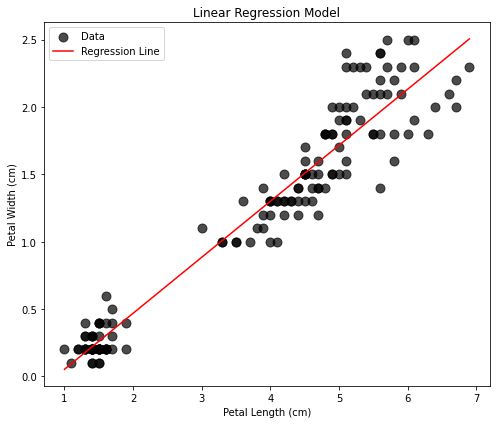

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 6))  # Create a figure

# Model 1: Petal Length as the independent variable
plt.scatter(data['petal_length'], data['petal_width'], label='Data', color='black', alpha=0.7, s=80)
plt.title("Linear Regression Model")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

# Plot the regression line
alpha1_mean = trace_high['alpha_high'].mean()
beta1_mean = trace_high['beta_high'].mean()
x_values = np.linspace(data['petal_length'].min(), data['petal_length'].max(), 100)
y_values = alpha1_mean + beta1_mean * x_values
plt.plot(x_values, y_values, color='red', label='Regression Line')
plt.legend()

plt.tight_layout()
plt.show()


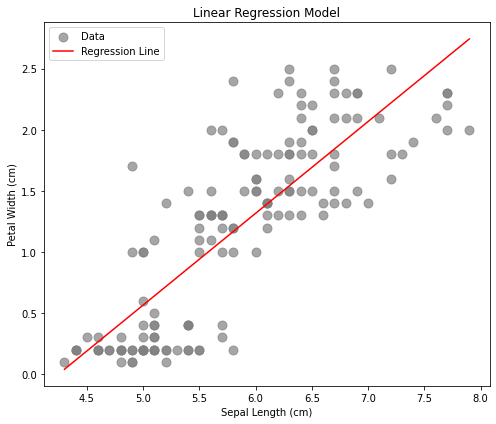

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 6))  # Create a new figure

# Model 2: Sepal Length as the independent variable
plt.scatter(data['sepal_length'], data['petal_width'], label='Data', color='grey', alpha=0.7, s=80)
plt.title("Linear Regression Model")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Width (cm)")

# Plot the regression line
alpha2_mean = trace_low['alpha_low'].mean()
beta2_mean = trace_low['beta_low'].mean()
x_values = np.linspace(data['sepal_length'].min(), data['sepal_length'].max(), 100)
y_values = alpha2_mean + beta2_mean * x_values
plt.plot(x_values, y_values, color='red', label='Regression Line')
plt.legend()

plt.tight_layout()
plt.show()


In [42]:
print("Conclusion")
print("Assessing the R-squared values and the choice of independent variables, we arrive at the following conclusions:")
print("The model (utilizing 'Petal Length' as the independent variable) attains an R-squared value of 0.9271, signifying its capacity to account for roughly 92.71% of the variability in the dependent variable, 'Petal Width'.")
print("In contrast, the model (employing 'Sepal Length' as the independent variable) obtains a lower R-squared value of 0.6690, explaining approximately 66.90% of the variance in 'Petal Width'.")
print("A higher R-squared value indicates the model's effectiveness in unraveling the variations in the dependent variable. In this context, the model using 'Petal Length' demonstrates a significantly superior R-squared value compared to the 'Sepal Length' model.")
print("As a result, the model that incorporates 'Petal Length' as the independent variable surpasses the other model. It provides a more accurate fit to the data, elucidating a larger portion of the variance in 'Petal Width'.")
print("The choice of 'Petal Length' as the independent variable, supported by its robust correlation with 'Petal Width' and the superior R-squared value, results in a more precise and effective linear regression model for predicting 'Petal Width'.")


Conclusion
Assessing the R-squared values and the choice of independent variables, we arrive at the following conclusions:
The model (utilizing 'Petal Length' as the independent variable) attains an R-squared value of 0.9271, signifying its capacity to account for roughly 92.71% of the variability in the dependent variable, 'Petal Width'.
In contrast, the model (employing 'Sepal Length' as the independent variable) obtains a lower R-squared value of 0.6690, explaining approximately 66.90% of the variance in 'Petal Width'.
A higher R-squared value indicates the model's effectiveness in unraveling the variations in the dependent variable. In this context, the model using 'Petal Length' demonstrates a significantly superior R-squared value compared to the 'Sepal Length' model.
As a result, the model that incorporates 'Petal Length' as the independent variable surpasses the other model. It provides a more accurate fit to the data, elucidating a larger portion of the variance in 'Petal Widt